Processing files:   0%|          | 0/11 [00:00<?, ?it/s]

3306/3306 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:   9%|▉         | 1/11 [04:19<43:13, 259.32s/it]

3321/3321 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  18%|█▊        | 2/11 [07:29<32:45, 218.36s/it]

3312/3312 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  27%|██▋       | 3/11 [10:42<27:36, 207.05s/it]

3307/3307 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  36%|███▋      | 4/11 [14:53<26:11, 224.46s/it]

3311/3311 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


Processing files:  45%|████▌     | 5/11 [18:03<21:11, 211.93s/it]

3301/3301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  55%|█████▍    | 6/11 [21:12<17:00, 204.05s/it]

3305/3305 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  64%|██████▎   | 7/11 [24:26<13:23, 200.99s/it]

3306/3306 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  73%|███████▎  | 8/11 [27:44<09:59, 199.79s/it]

3304/3304 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  82%|████████▏ | 9/11 [30:50<06:30, 195.48s/it]

3301/3301 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  91%|█████████ | 10/11 [34:07<03:16, 196.14s/it]

3306/3306 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files: 100%|██████████| 11/11 [37:18<00:00, 203.54s/it]


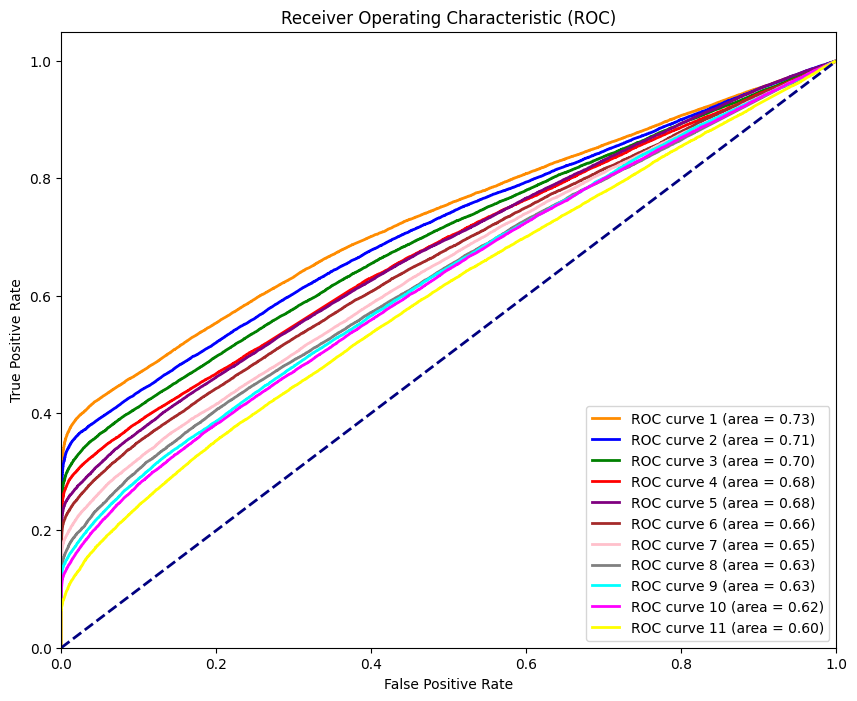

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# File paths for the signal data
signal_files = [
    'data/filtered_hc_1_2000.csv', 'data/filtered_hc_1_2100.csv',
    'data/filtered_hc_1_2200.csv', 'data/filtered_hc_1_2300.csv',
    'data/filtered_hc_1_2400.csv', 'data/filtered_hc_1_2500.csv',
    'data/filtered_hc_1_2600.csv', 'data/filtered_hc_1_2700.csv',
    'data/filtered_hc_1_2800.csv', 'data/filtered_hc_1_2900.csv',
    'data/filtered_hc_1_3000.csv'
]

background_file = 'data/filtered_ttbar.csv'
columns = ['PID', 'PT', 'Eta', 'Phi', 'Px', 'Py', 'Pz', 'E']

# Load background data
background_data = pd.read_csv(background_file)
background_data = background_data[columns]
background_data['label'] = 0

# Placeholder for storing ROC curves
fprs, tprs, roc_aucs = [], [], []

# Define the model structure
def create_model():
    model = models.Sequential([
        layers.Input(shape=(8,)),  # Define the input shape here
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Iterate over each signal file
for idx, signal_file in enumerate(tqdm(signal_files, desc="Processing files")):
    # Load signal data
    signal_data = pd.read_csv(signal_file)
    signal_data = signal_data[columns]
    signal_data['label'] = 1
    
    # Combine with background data
    data = pd.concat([signal_data, background_data])
    
    # Split data into features and labels
    X = data[columns]
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=idx)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Predict probabilities and calculate ROC curve and AUC
    y_pred_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

# Plot all ROC curves on a single plot
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']

for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], color=colors[i], lw=2, label=f'ROC curve {i+1} (area = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Processing files:   0%|          | 0/11 [00:00<?, ?it/s]

3312/3312 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Processing files:   9%|▉         | 1/11 [02:40<26:48, 160.87s/it]

3301/3301 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Processing files:  18%|█▊        | 2/11 [05:26<24:31, 163.51s/it]

3306/3306 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Processing files:  27%|██▋       | 3/11 [08:27<22:53, 171.70s/it]

3308/3308 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Processing files:  36%|███▋      | 4/11 [11:09<19:33, 167.70s/it]

3300/3300 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Processing files:  45%|████▌     | 5/11 [14:11<17:17, 172.99s/it]

3316/3316 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


Processing files:  55%|█████▍    | 6/11 [19:49<19:05, 229.15s/it]

3306/3306 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  64%|██████▎   | 7/11 [23:02<14:29, 217.27s/it]

3302/3302 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files:  73%|███████▎  | 8/11 [26:25<10:38, 212.78s/it]

3300/3300 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


Processing files:  82%|████████▏ | 9/11 [29:33<06:49, 204.84s/it]

3297/3297 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


Processing files:  91%|█████████ | 10/11 [33:49<03:40, 220.74s/it]

3303/3303 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


Processing files: 100%|██████████| 11/11 [38:04<00:00, 207.68s/it]


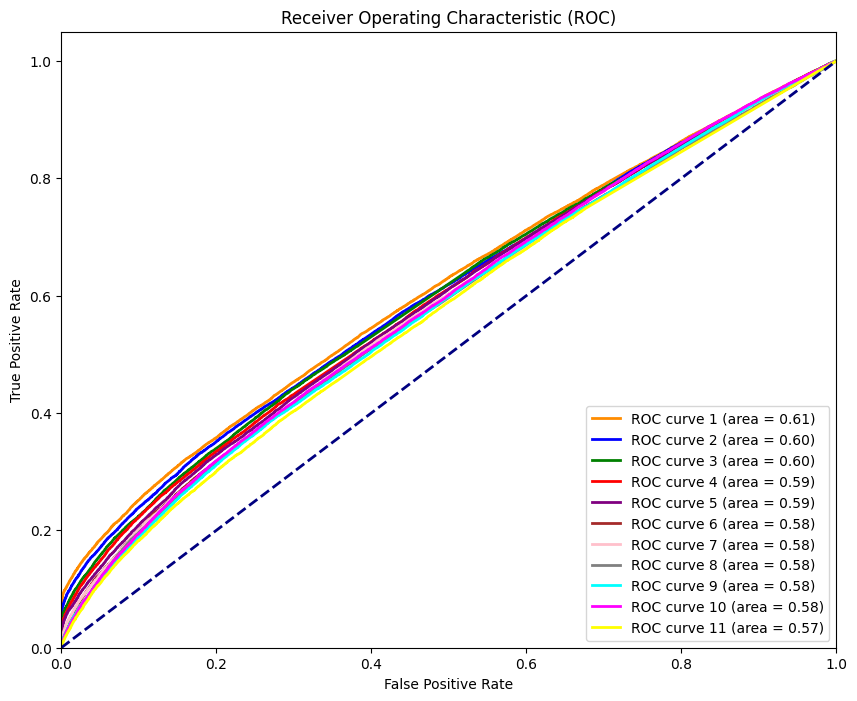

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# File paths for the signal data
signal_files = [
    'data/filtered_hc_5_2000.csv', 'data/filtered_hc_5_2100.csv',
    'data/filtered_hc_5_2200.csv', 'data/filtered_hc_5_2300.csv',
    'data/filtered_hc_5_2400.csv', 'data/filtered_hc_5_2500.csv',
    'data/filtered_hc_5_2600.csv', 'data/filtered_hc_5_2700.csv',
    'data/filtered_hc_5_2800.csv', 'data/filtered_hc_5_2900.csv',
    'data/filtered_hc_5_3000.csv'
]

background_file = 'data/filtered_ttbar.csv'
columns = ['PID', 'PT', 'Eta', 'Phi', 'Px', 'Py', 'Pz', 'E']

# Load background data
background_data = pd.read_csv(background_file)
background_data = background_data[columns]
background_data['label'] = 0

# Placeholder for storing ROC curves
fprs, tprs, roc_aucs = [], [], []

# Define the model structure
def create_model():
    model = models.Sequential([
        layers.Input(shape=(8,)),  # Define the input shape here
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Iterate over each signal file
for idx, signal_file in enumerate(tqdm(signal_files, desc="Processing files")):
    # Load signal data
    signal_data = pd.read_csv(signal_file)
    signal_data = signal_data[columns]
    signal_data['label'] = 1
    
    # Combine with background data
    data = pd.concat([signal_data, background_data])
    
    # Split data into features and labels
    X = data[columns]
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=idx)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Predict probabilities and calculate ROC curve and AUC
    y_pred_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

# Plot all ROC curves on a single plot
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']

for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], color=colors[i], lw=2, label=f'ROC curve {i+1} (area = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


2024-08-24 04:29:44.894023: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 04:29:44.914166: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 04:29:44.963900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 04:29:45.054581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 04:29:45.069256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 04:29:45.178801: I tensorflow/core/platform/cpu_feature_gu

3305/3305 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


Processing files:   9%|▉         | 1/11 [04:31<45:19, 271.93s/it]

3302/3302 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  18%|█▊        | 2/11 [08:00<35:14, 234.95s/it]

3296/3296 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  27%|██▋       | 3/11 [12:33<33:36, 252.07s/it]

3296/3296 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  36%|███▋      | 4/11 [17:52<32:28, 278.33s/it]

3305/3305 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  45%|████▌     | 5/11 [21:43<26:07, 261.33s/it]

3307/3307 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  55%|█████▍    | 6/11 [25:43<21:11, 254.33s/it]

3312/3312 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  64%|██████▎   | 7/11 [30:12<17:16, 259.06s/it]

3296/3296 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


Processing files:  73%|███████▎  | 8/11 [35:07<13:30, 270.32s/it]

3301/3301 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  82%|████████▏ | 9/11 [39:10<08:43, 261.94s/it]

3307/3307 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files:  91%|█████████ | 10/11 [44:02<04:31, 271.21s/it]

3292/3292 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


Processing files: 100%|██████████| 11/11 [49:05<00:00, 267.76s/it]


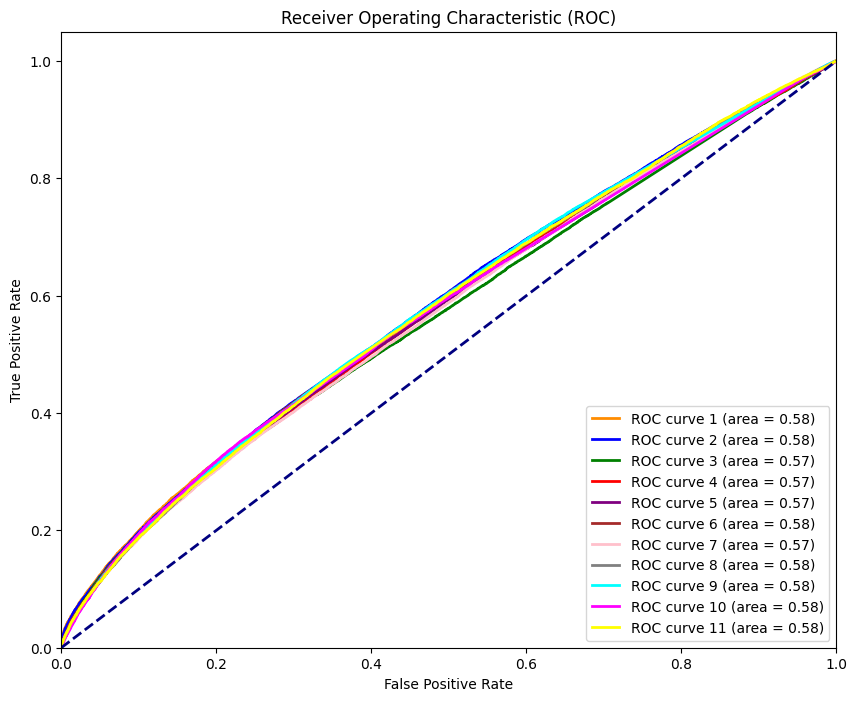

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# File paths for the signal data
signal_files = [
    'data/filtered_hc_10_2000.csv', 'data/filtered_hc_10_2100.csv',
    'data/filtered_hc_10_2200.csv', 'data/filtered_hc_10_2300.csv',
    'data/filtered_hc_10_2400.csv', 'data/filtered_hc_10_2500.csv',
    'data/filtered_hc_10_2600.csv', 'data/filtered_hc_10_2700.csv',
    'data/filtered_hc_10_2800.csv', 'data/filtered_hc_10_2900.csv',
    'data/filtered_hc_10_3000.csv'
]

background_file = 'data/filtered_ttbar.csv'
columns = ['PID', 'PT', 'Eta', 'Phi', 'Px', 'Py', 'Pz', 'E']

# Load background data
background_data = pd.read_csv(background_file)
background_data = background_data[columns]
background_data['label'] = 0

# Placeholder for storing ROC curves
fprs, tprs, roc_aucs = [], [], []

# Define the model structure
def create_model():
    model = models.Sequential([
        layers.Input(shape=(8,)),  # Define the input shape here
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Iterate over each signal file
for idx, signal_file in enumerate(tqdm(signal_files, desc="Processing files")):
    # Load signal data
    signal_data = pd.read_csv(signal_file)
    signal_data = signal_data[columns]
    signal_data['label'] = 1
    
    # Combine with background data
    data = pd.concat([signal_data, background_data])
    
    # Split data into features and labels
    X = data[columns]
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=idx)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Predict probabilities and calculate ROC curve and AUC
    y_pred_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)

# Plot all ROC curves on a single plot
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow']

for i in range(len(fprs)):
    plt.plot(fprs[i], tprs[i], color=colors[i], lw=2, label=f'ROC curve {i+1} (area = {roc_aucs[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
